In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [17]:
m = 100
X = 9 * np.random.rand(m, 1) - 7
y = X**2 + 3*X + 5 + np.random.randn(m, 1)

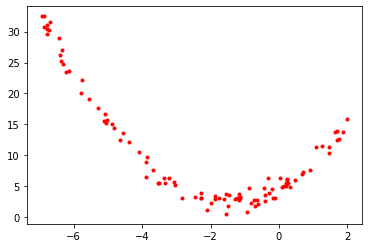

In [18]:
plt.plot(X, y, "r.")

In [19]:
X_valid = np.linspace(-7, 2, num=m).reshape(m, 1)

In [20]:
reg = LinearRegression()
reg.fit(X, y)
reg.intercept_, reg.coef_

(array([4.86583114]), array([[-2.40126166]]))

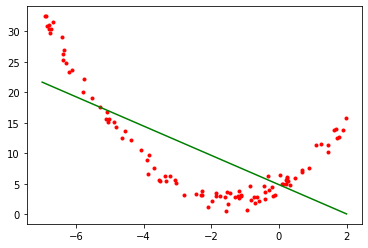

In [21]:
pred = reg.predict(X_valid)

plt.plot(X, y, 'r.')
plt.plot(X_valid, pred, "g-")

In [22]:
poly= PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_valid_poly = poly.fit_transform(X_valid)

In [23]:
X[:5]

array([[-0.63502308],
       [-6.87887923],
       [-4.63090189],
       [ 0.23522634],
       [-5.11050991]])

In [24]:
X_poly[:5]

array([[-0.63502308,  0.40325431],
       [-6.87887923, 47.31897949],
       [-4.63090189, 21.4452523 ],
       [ 0.23522634,  0.05533143],
       [-5.11050991, 26.11731159]])

In [25]:
reg.fit(X_poly, y)
reg.intercept_, reg.coef_

(array([4.83855035]), array([[3.03800805, 1.01390544]]))

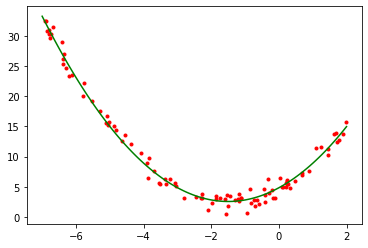

In [26]:
pred = reg.predict(X_valid_poly)

plt.plot(X, y, 'r.')
plt.plot(X_valid, pred, "g-")

In [27]:
from sklearn.pipeline import make_pipeline
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

model = make_pipeline(PolynomialFeatures(), LinearRegression())
# pipe = Pipeline([('poly', PolynomialFeatures()), ('reg', LinearRegression())])

In [28]:
type(model)
# type(pipe)

sklearn.pipeline.Pipeline

In [29]:
param_grid = {'polynomialfeatures__degree': np.arange(15),}
grid = GridSearchCV(model, param_grid, cv=5)
# grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [30]:
grid.best_params_

{'polynomialfeatures__degree': 2}